<a href="https://colab.research.google.com/github/ChesterHsieh/image_lab/blob/main/Image_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Required python library**

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn python-multipart
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
exit(0)  


In [3]:
import torch


# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [5]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from typing import List

from fastapi import FastAPI, File, UploadFile
from fastapi.responses import HTMLResponse
from PIL import Image
from io import BytesIO
import numpy as np
import io
from starlette.responses import StreamingResponse

# **Image processing**

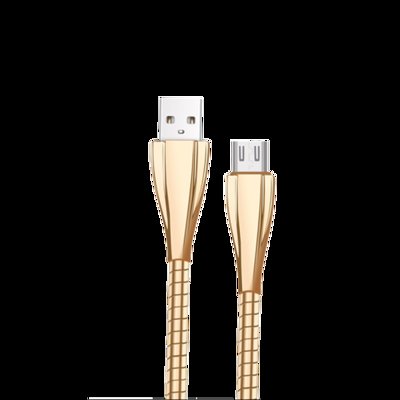

In [16]:
!wget https://images.pcone.com.tw/uploads/product_image/2940256/058dab31a76b836b06e884e89e5d08c1/b12cbedad8f1a48fbe087af2f57e00ed.png -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [ ]:
def mask_detect(im_vec):
  




# **Public IP + Fastapi**




In [9]:
def read_imagefile(file) -> Image.Image:
    image = Image.open(BytesIO(file))
    image = image.resize((1024,1024))
    image = np.array(image)
    div = divergence(image)
    div = np.absolute(div)
    return div

def divergence(field):
    "return the divergence of a n-D field"
    return np.sum(np.absolute(np.gradient(field)))/100000

app = FastAPI()

@app.get('/index')
async def home():
  return "Hello World"


@app.post("/files/")
async def create_files(files: List[UploadFile] = File(...)):
    extension = all([file.filename.split(".")[-1] in ("jpg", "jpeg", "png") for file in files])
    if not extension:
        return "Image must be jpg or png format!"
    images_div = [read_imagefile(await file.read()) for file in files]
    return f"image divergency : {images_div}"

@app.post("/vector_image/")
async def image_endpoint():
    # img = ... # Create the image here
    return Response(content=img, media_type="image/png")

@app.post("/uploadfiles/")
async def create_upload_files(files: List[UploadFile] = File(...)):
    return {"filenames": [file.filename for file in files]}


@app.get("/")
async def main():
    content = """
<body>
<form action="/files/" enctype="multipart/form-data" method="post">
<input name="files" type="file" multiple>
<input type="submit">
</body>
    """
    return HTMLResponse(content=content)



ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://d9d7ed7bc667.ngrok.io


INFO:     Started server process [218]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     118.163.99.205:0 - "GET / HTTP/1.1" 200 OK
INFO:     118.163.99.205:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     163.28.130.5:0 - "GET / HTTP/1.1" 200 OK
INFO:     118.163.99.205:0 - "POST /files/ HTTP/1.1" 400 Bad Request
INFO:     60.199.175.136:0 - "GET /files/ HTTP/1.1" 405 Method Not Allowed


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [218]
